___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Bruno Morales Balkins

#### Daniel do Carmo Granja de Castro

#### Omar Dibo Calixto Afrange Neto

#### Nome 4

___

# Qual a chance de um estudante entrar em uma faculdade baseado em diversos parametros relacionados a notas em exames e qualidade da faculdade.

___

## A. INTRODUÇÃO

Conseguir gerar uma porcentagem que sera a chance de um aluno ser adimitido em uma faculdade.

[Aqui mais espaço!]

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [71]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

In [72]:
print('Esperamos trabalhar no diretório')
print("documents/github/projeto3dpdados/")

Esperamos trabalhar no diretório
documents/github/projeto3dpdados/


### BASE DE DADOS

In [73]:
dados = pd.read_csv('Admission_Predict.csv')
dados

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Serial No.: Número de série do aluno

GRE Scores: Nota do aluno no teste GRE

TOEFL Scores: Nota do aluno no teste TOEFL

University Rating: Classificação do nível de ensino da universidade desejada

Statment of purpose (SOP): Qualidade do texto sobre o objeto de pesquisa do aluno

Letter of recomendation (LOR): Qualidade da carta de recomendação do aluno

Undergraduate Grade Point Average (CGPA): Média acadêmica do aluno

Research: Experiência com pesquisa. 1- Sim, 2- Não

Change of Admission: Probabilidade de admissão do aluno

In [74]:
dados = dados.drop("Serial No.",axis=1)
dados

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


### ANÁLISE DESCRITIVA

**Variáveis Quantitativas**

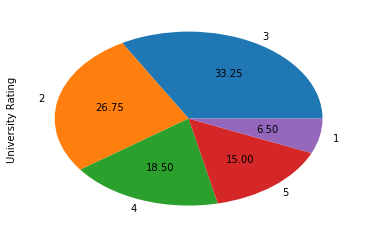

In [75]:
dfc2 = dados['University Rating'].value_counts()
dfc2.plot(kind='pie', autopct="%0.2f",legend=False);

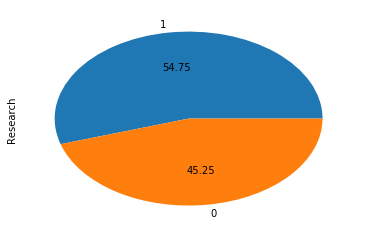

In [76]:
dfc3 = dados['Research'].value_counts()
dfc3.plot(kind='pie', autopct="%0.2f",legend=False);

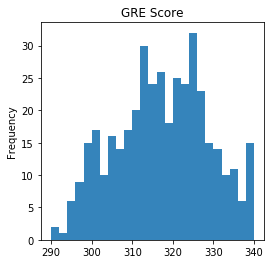

In [77]:
plot = dados["GRE Score"].plot.hist(bins=25,title='GRE Score', figsize=(4, 4), alpha=0.9)
plt.show()

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

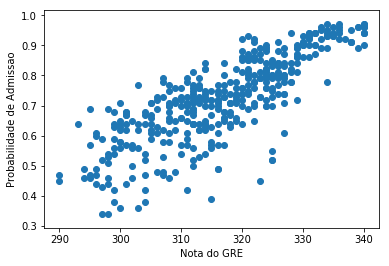

In [97]:
x = dados['GRE Score']
y = dados['Chance of Admit ']


plt.scatter(x,y);
plt.xlabel("Nota do GRE");
plt.ylabel("Probabilidade de Admissao");


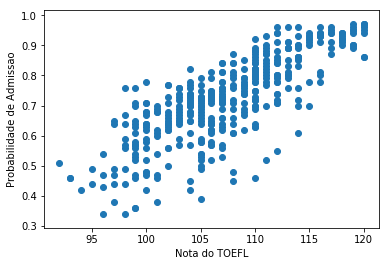

In [100]:
x2 = dados['TOEFL Score']
y2 = dados['Chance of Admit ']

plt.scatter(x2,y2);
plt.xlabel("Nota do TOEFL");
plt.ylabel("Probabilidade de Admissao");


In [101]:
x3 = dados['University Rating']
y3 = dados['Chance of Admit ']

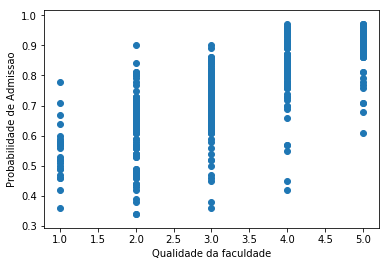

In [105]:
x3 = dados['University Rating']
y3 = dados['Chance of Admit ']


plt.scatter(x3,y3);
plt.xlabel("Qualidade da faculdade");
plt.ylabel("Probabilidade de Admissao");


In [107]:
x4 = dados['CGPA']
y4 = dados['Chance of Admit ']

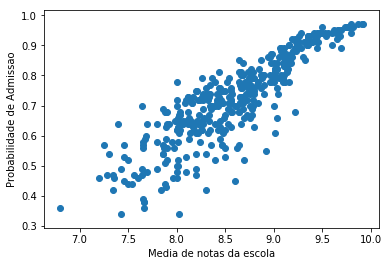

In [108]:
x4 = dados['CGPA']
y4 = dados['Chance of Admit ']

plt.scatter(x4,y4);
plt.xlabel("Media de notas da escola");
plt.ylabel("Probabilidade de Admissao");


o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS